## Random sample imputation randomly selects the value from the column and replace its null values with randomly selected values from its own column

## This algorithms are used when we are using Linear algorithms like Linear regression.THis doesnot work well in Tree algorithms like decision tree

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [56]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
df['Age_imputed'] = df['Age']

In [60]:
X = df.drop(['Survived'],axis = 1)
Y = df['Survived']

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                Y,
                                                test_size=0.2,
                                                random_state=0)

In [64]:
X_train

,Age,Fare,Age_imputed
140,NaN,15.2458,NaN
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0
...,...,...,...
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,NaN
559,36.0,17.4000,36.0


In [66]:
X_train.isnull().sum(),X_test.isnull().sum()

(Age            141
 Fare             0
 Age_imputed    141
 dtype: int64,
 Age            36
 Fare            0
 Age_imputed    36
 dtype: int64)

In [68]:
X_train['Age'].isna()
X_train[X_train['Age'].isna()] # THis filters rows with Age = null

,Age,Fare,Age_imputed
140,NaN,15.2458,NaN
358,NaN,7.8792,NaN
674,NaN,0.0000,NaN
727,NaN,7.7375,NaN
428,NaN,7.7500,NaN
...,...,...,...
849,NaN,89.1042,NaN
87,NaN,8.0500,NaN
277,NaN,0.0000,NaN
359,NaN,7.8792,NaN


In [90]:
null_value_index = X_train[X_train['Age'].isna()].index #Finding the index of the null value

temp = X_train['Age_imputed'].dropna().sample(n=141,random_state=1).values #Generating the random 141 values where 141 values doesnot contains null
X_train.loc[null_value_index,'Age_imputed'] = temp #Replacing the null values of Age_imputed column with temp value
# In df.loc[null_value_index,'Age_imputed'] null_value_index means index of the row to be selected and 'Age_imputed' means columns to be selected

In [94]:
X_train

,Age,Fare,Age_imputed
140,NaN,15.2458,20.0
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0
...,...,...,...
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,21.0
559,36.0,17.4000,36.0


In [74]:
X_test.isnull().sum()

Age            36
Fare            0
Age_imputed    36
dtype: int64

In [76]:
X_test.head()

,Age,Fare,Age_imputed
495,NaN,14.4583,NaN
648,NaN,7.5500,NaN
278,7.0,29.1250,7.0
31,NaN,146.5208,NaN
255,29.0,15.2458,29.0


In [98]:
null_indices = X_test[X_test['Age'].isna()].index

temp = X_test['Age_imputed'].dropna().sample(n=36,random_state = 1).values
X_test.loc[null_indices,'Age_imputed'] = temp

In [100]:
X_test

,Age,Fare,Age_imputed
495,NaN,14.4583,27.0
648,NaN,7.5500,30.0
278,7.0,29.1250,7.0
31,NaN,146.5208,60.0
255,29.0,15.2458,29.0
...,...,...,...
780,13.0,7.2292,13.0
837,NaN,8.0500,21.0
215,31.0,113.2750,31.0
833,23.0,7.8542,23.0


In [102]:
import seaborn as sns

<Axes: xlabel='Age_imputed', ylabel='Density'>

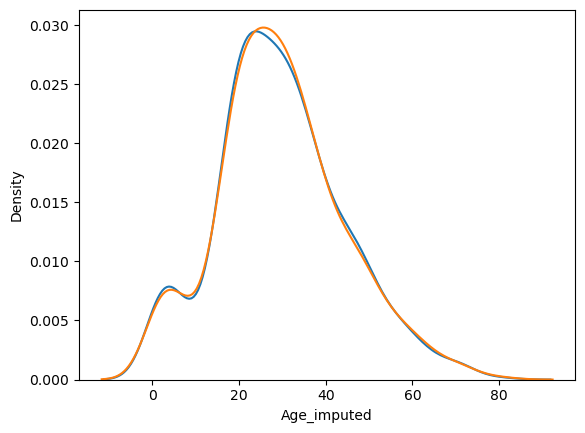

In [106]:
sns.kdeplot(X_train['Age_imputed'])
sns.kdeplot(X_train['Age'])

In [110]:
X_train.corr()

,Age,Fare,Age_imputed
Age,1.00000,0.101560,1.000000
Fare,0.10156,1.000000,0.094835
Age_imputed,1.00000,0.094835,1.000000


In [112]:
X_train.var()

Age             213.716509
Fare           2513.549265
Age_imputed     214.421591
dtype: float64

<Axes: >

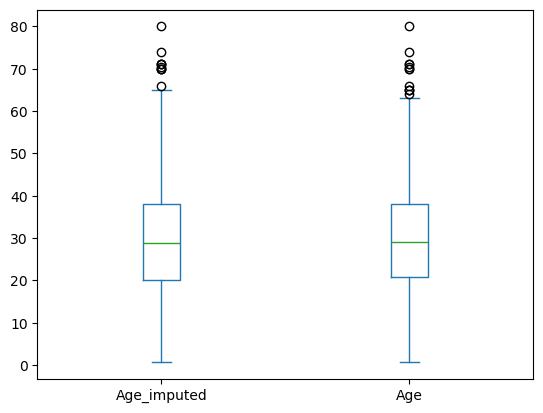

In [122]:
X_train[['Age_imputed','Age']].plot.box()
# X_train['Age'].plot.box()